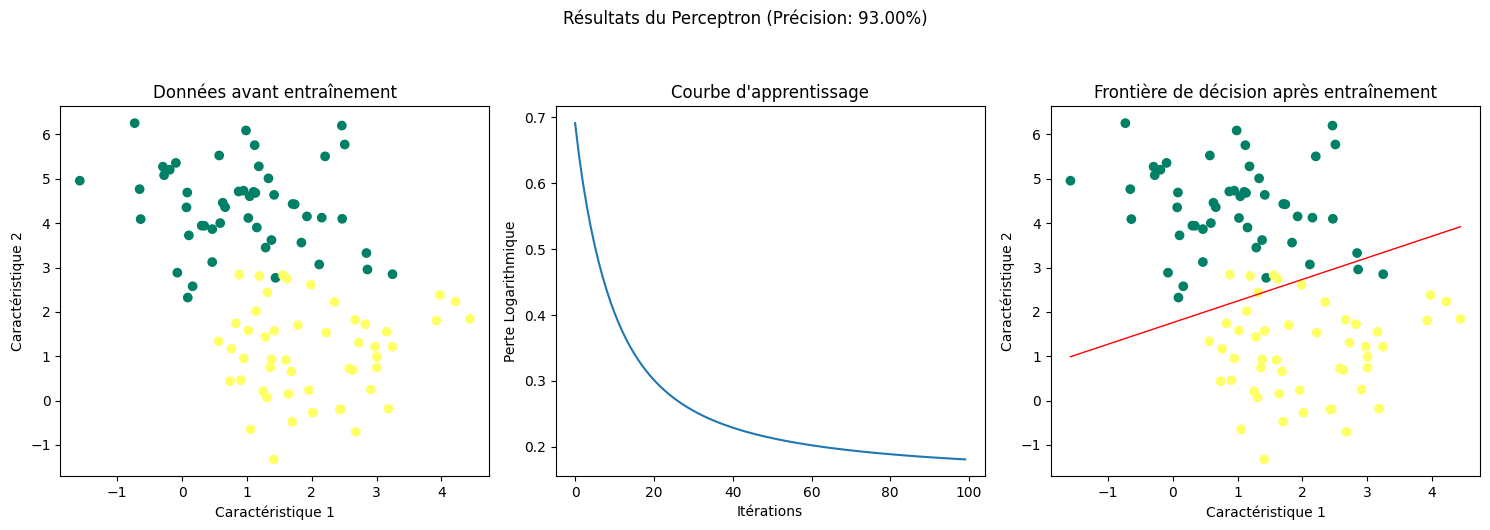

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Générer des données synthétiques pour l'entraînement
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# Créer une figure globale avec 3 sous-graphiques
plt.figure(figsize=(15, 5))

# --- Graphique 1 : Données avant entraînement ---
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.title('Données avant entraînement')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X)
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    accuracy = accuracy_score(y, y_pred)

    # --- Graphique 2 : Courbe d'apprentissage ---
    plt.subplot(1, 3, 2)
    plt.plot(Loss)
    plt.title('Courbe d\'apprentissage')
    plt.xlabel('Itérations')
    plt.ylabel('Perte Logarithmique')

    return W, b, accuracy

# Entraîner le modèle
W, b, accuracy = artificial_neuron(X, y)

# --- Graphique 3 : Frontière de décision après entraînement ---
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

# Tracer la frontière de décision (où W0*x0 + W1*x1 + b = 0)
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = (-W[0] * x1_vals - b) / W[1]
plt.plot(x1_vals, x2_vals, c='red', linewidth=1)

plt.title('Frontière de décision après entraînement')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')

# Afficher la précision dans le titre
plt.suptitle(f'Résultats du Perceptron (Précision: {accuracy:.2%})', y=1.05)

plt.tight_layout()
plt.show()